# Supervised Learning: Classification

# Exploring Data and Features

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')

In [ ]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Cleaning Data

In [ ]:
df.duplicated().sum()

18078

In [3]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(301717, 18)

In [ ]:
# check for null values
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


## Features Analysis

In [4]:
# Categorical features
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

cat_cols = list(cat_cols)
num_cols = list(num_cols)

cat_cols

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [ ]:
for col in cat_cols:
  print(df[col].value_counts())

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64
Smoking
No     174312
Yes    127405
Name: count, dtype: int64
AlcoholDrinking
No     280136
Yes     21581
Name: count, dtype: int64
Stroke
No     289653
Yes     12064
Name: count, dtype: int64
DiffWalking
No     257362
Yes     44355
Name: count, dtype: int64
Sex
Female    159671
Male      142046
Name: count, dtype: int64
AgeCategory
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: count, dtype: int64
Race
White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: count, dtype: int64
Diabetic
No           

In [7]:
cat_cols.remove('GenHealth')
cat_cols

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [9]:
df['Diabetic'].value_counts()

,count
Diabetic,
No,251796
Yes,40589
"No, borderline diabetes",6776
Yes (during pregnancy),2556


In [10]:
def diabet(text):
  if 'No' in text:
    return 0
  else:
    return 1

In [14]:
df['Diabetic'] = df['Diabetic'].apply(diabet)

In [16]:
! pip install scikit-learn

In [19]:
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_columns(data, categorical_columns):
    """Encodes categorical nominal data for multiple columns using OneHotEncoder.

    Args:
        data: The pandas DataFrame containing the data.
        categorical_columns: A list of column names to encode.

    Returns:
        A new pandas DataFrame with encoded categorical columns.
    """

    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
    encoded_data = data.copy()

    for col in categorical_columns:
        encoded_features = encoder.fit_transform(data[[col]])
        encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
        encoded_data = pd.concat([encoded_data.drop(columns=[col]), encoded_df], axis=1)

    return encoded_data

In [20]:
cat_df = encode_categorical_columns(df, cat_cols)
cat_df.head(10)

,BMI,PhysicalHealth,MentalHealth,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_1,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,Very good,5.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,20.34,0.0,0.0,Very good,7.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.58,20.0,30.0,Fair,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,24.21,0.0,0.0,Good,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,23.71,28.0,0.0,Very good,8.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,28.87,6.0,0.0,Fair,12.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,21.63,15.0,0.0,Fair,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
7,31.64,5.0,0.0,Good,9.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8,26.45,0.0,0.0,Fair,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,40.69,0.0,0.0,Good,10.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [21]:

# Create a dictionary to map performance values to numerical values
mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

# Map the performance values to numerical values
cat_df['GenHealth'] = cat_df['GenHealth'].map(mapping)

(cat_df)

,BMI,PhysicalHealth,MentalHealth,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_1,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,4,5.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,20.34,0.0,0.0,4,7.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.58,20.0,30.0,2,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,24.21,0.0,0.0,3,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,23.71,28.0,0.0,4,8.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301712,27.41,7.0,0.0,2,6.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
301713,29.84,0.0,0.0,4,5.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
301714,24.24,0.0,0.0,3,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
301715,32.81,0.0,0.0,3,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
num_cols

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [ ]:
df[num_cols].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'PhysicalHealth'}>],
       [<Axes: title={'center': 'MentalHealth'}>,
        <Axes: title={'center': 'SleepTime'}>]], dtype=object)

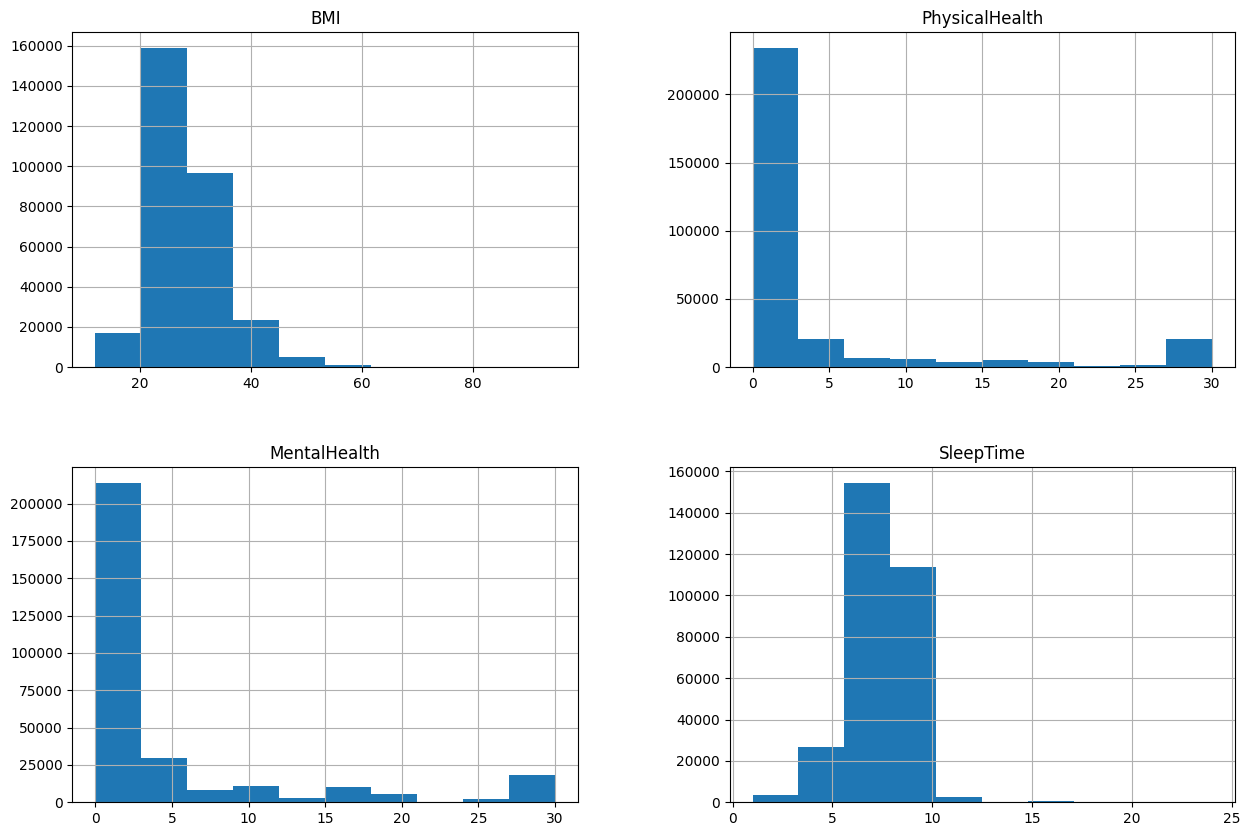

In [ ]:
df[num_cols].hist(figsize=(15,10))

In [22]:
cat_df.corr()

,BMI,PhysicalHealth,MentalHealth,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_1,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
BMI,1.000000,0.103813,0.056724,-0.221339,-0.048653,0.047260,0.015890,-0.043463,0.016314,0.177388,...,-0.081949,0.077074,0.019804,0.009565,-0.041448,0.196552,-0.144441,0.087563,0.047796,-0.038060
PhysicalHealth,0.103813,1.000000,0.279657,-0.480076,-0.058406,0.165235,0.110270,-0.023255,0.132966,0.422935,...,-0.039036,0.005113,-0.011764,0.011739,0.008125,0.146629,-0.224121,0.110083,0.138219,0.036753
MentalHealth,0.056724,0.279657,1.000000,-0.230043,-0.117078,0.020913,0.078364,0.045421,0.041324,0.142964,...,-0.027199,0.004008,0.004558,0.026678,-0.011455,0.019870,-0.084274,0.105266,0.032105,-0.040214
GenHealth,-0.221339,-0.480076,-0.230043,1.000000,0.058260,-0.237920,-0.164441,0.039991,-0.164449,-0.409798,...,0.038889,-0.053527,-0.019786,-0.008593,0.045336,-0.262609,0.270619,-0.126698,-0.171259,-0.042863
SleepTime,-0.048653,-0.058406,-0.117078,0.058260,1.000000,0.010834,-0.027874,-0.003172,0.013697,-0.019155,...,-0.018919,-0.018004,-0.011670,-0.029744,0.039549,0.006780,-0.000157,-0.045368,0.008028,0.043241
HeartDisease_Yes,0.047260,0.165235,0.020913,-0.237920,0.010834,1.000000,0.104524,-0.036289,0.194665,0.196420,...,-0.032841,-0.014517,-0.040680,-0.006076,0.048892,0.170331,-0.093597,0.035784,0.142672,0.090644
Smoking_Yes,0.015890,0.110270,0.078364,-0.164441,-0.027874,0.104524,1.000000,0.109183,0.058868,0.115789,...,-0.064314,-0.044215,-0.073012,0.013278,0.083659,0.049269,-0.089864,0.017545,0.031890,0.030438
AlcoholDrinking_Yes,-0.043463,-0.023255,0.045421,0.039991,-0.003172,-0.036289,0.109183,1.000000,-0.022707,-0.041135,...,-0.024323,-0.029654,-0.018975,0.003102,0.040372,-0.063486,0.024408,-0.007114,-0.031166,-0.008739
Stroke_Yes,0.016314,0.132966,0.041324,-0.164449,0.013697,0.194665,0.058868,-0.022707,1.000000,0.170664,...,-0.017760,0.022010,-0.028920,0.003676,0.006864,0.100990,-0.074898,0.034942,0.089109,0.046039
DiffWalking_Yes,0.177388,0.422935,0.142964,-0.409798,-0.019155,0.196420,0.115789,-0.041135,0.170664,1.000000,...,-0.042431,0.034050,-0.014040,0.004362,-0.004359,0.203177,-0.271748,0.095826,0.149471,0.060596


In [23]:
# import train test split
from sklearn.model_selection import train_test_split

# import robust scaler
from sklearn.preprocessing import RobustScaler

In [24]:
x_train, x_test, y_train, y_test = train_test_split(cat_df.drop('HeartDisease_Yes',axis=1), cat_df['HeartDisease_Yes'], test_size=0.2, random_state=42, stratify=cat_df['HeartDisease_Yes'])

In [25]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
y_train.value_counts()

,count
HeartDisease_Yes,
0.0,219564
1.0,21809


In [ ]:
y_train.value_counts(normalize=True)

,proportion
HeartDisease_Yes,
0.0,0.909646
1.0,0.090354


In [ ]:
y_test.value_counts(normalize=True)

,proportion
HeartDisease_Yes,
0.0,0.909651
1.0,0.090349


In [27]:
x_test.BMI.describe()

,BMI
count,60344.000000
mean,28.447789
std,6.474250
min,12.020000
25%,24.020000
50%,27.410000
75%,31.640000
max,91.550000


In [ ]:
x_train[num_cols]

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,31.51,0.0,3.0,7.0
1,21.54,0.0,0.0,8.0
2,31.93,14.0,0.0,8.0
3,24.56,0.0,0.0,7.0
4,37.23,4.0,0.0,7.0
...,...,...,...,...
241368,31.57,0.0,0.0,8.0
241369,29.84,3.0,10.0,7.0
241370,26.57,3.0,0.0,8.0
241371,31.32,2.0,4.0,6.0


In [28]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(x_train[num_cols])


X_test_scaled = scaler.transform(x_test[num_cols])


X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=num_cols)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=num_cols)




In [31]:
X_test_scaled_df = pd.concat([X_test_scaled_df, x_test.drop(columns=num_cols)], axis=1, ignore_index="False")
X_train_scaled_df = pd.concat([X_train_scaled_df, x_train.drop(columns=num_cols)], axis=1, ignore_index="False")

In [32]:
X_test_scaled_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.203145,0.0,0.00,0.0,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,-0.038008,0.0,0.00,0.0,4,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.342071,0.0,0.50,0.0,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,-0.038008,0.0,0.00,-0.5,3,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2.154653,7.5,0.00,1.0,2,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60339,0.356488,0.0,0.00,1.5,3,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
60340,-0.264744,5.0,3.75,1.0,2,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
60341,-1.117955,0.0,0.00,0.5,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
60342,-1.015727,0.0,0.00,0.5,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [59]:
import matplotlib.pyplot as plt

In [34]:
log = LogisticRegression(max_iter=500, class_weight='balanced')
log.fit(X_train_scaled_df, y_train)
y_pred = log.predict(X_test_scaled_df)
accuracy = accuracy_score(y_test, y_pred)

In [35]:
accuracy

0.7409021609439215

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_df, y_train)
y_pred2 = rf.predict(X_test_scaled_df)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.8970900172345221


**Classification Report of Logistic Regression Model**

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     54892
         1.0       0.23      0.77      0.35      5452

    accuracy                           0.74     60344
   macro avg       0.60      0.76      0.59     60344
weighted avg       0.90      0.74      0.79     60344



In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("AUC score: ", auc)

AUC score:  0.7559851602685543


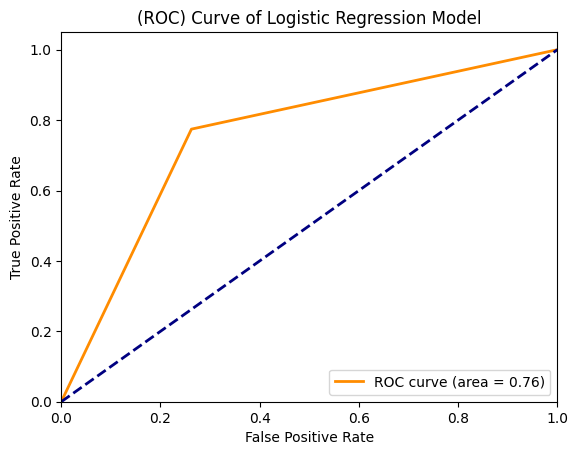

In [61]:

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve of Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()

**Classification Report of Random Forest Classifier**

In [38]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     54892
         1.0       0.31      0.12      0.17      5452

    accuracy                           0.90     60344
   macro avg       0.62      0.55      0.56     60344
weighted avg       0.86      0.90      0.88     60344



In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
auc = roc_auc_score(y_test, y_pred2)
print("AUC score: ", auc)

AUC score:  0.5457121591766749


**Resampling Dataset**

In [41]:
! pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.3 MB/s eta 0:00:00


In [46]:
from imblearn.combine import SMOTEENN
smotenn = SMOTEENN(sampling_strategy='auto')
X_train_smotenn, y_train_smotenn = smotenn.fit_resample(X_train_scaled_df, y_train)

In [53]:
y_train_smotenn.value_counts()

,count
HeartDisease_Yes,
1.0,190041
0.0,160752


In [47]:
log_snn = LogisticRegression(max_iter=500, random_state=43, class_weight='balanced')
log_snn.fit(X_train_smotenn, y_train_smotenn)
y_pred_snn = log_snn.predict(X_test_scaled_df)
accuracy_sn = accuracy_score(y_test, y_pred_snn)
accuracy_sn

0.7227396261434442

**classification report of LR model with SMOTEENN resampled data**

In [48]:
print(classification_report(y_test, y_pred_snn))

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.82     54892
         1.0       0.22      0.80      0.34      5452

    accuracy                           0.72     60344
   macro avg       0.60      0.76      0.58     60344
weighted avg       0.90      0.72      0.78     60344



In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_snn)
auc = roc_auc_score(y_test, y_pred_snn)
print("AUC score: ", auc)

AUC score:  0.7574008127691972


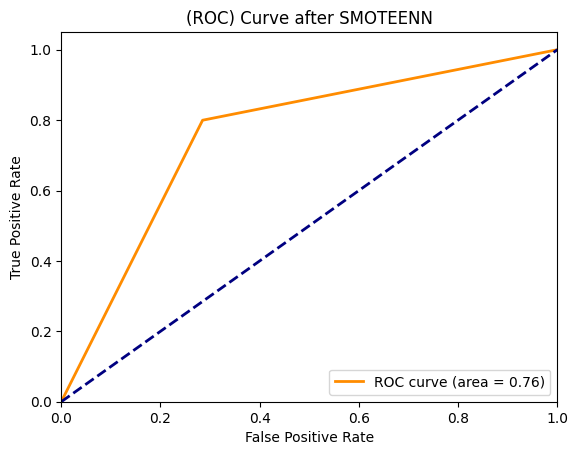

In [64]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve after SMOTEENN')
plt.legend(loc='lower right')
plt.show()

# Unsupervised Learning - Clustering

## **K-Means Clustering**

In [ ]:
data = pd.concat([X_test_scaled_df, y_test], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,HeartDisease_Yes
0,0.051114,3.5,0.00,-0.5,4,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.188729,1.0,1.50,0.0,4,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.414155,0.0,0.00,-0.5,3,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.137615,15.0,0.00,0.5,2,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.955439,15.0,0.00,-0.5,3,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,-0.853211,0.0,0.00,0.0,5,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,-0.495413,0.0,0.00,0.5,4,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.123198,0.0,0.00,0.5,5,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,-0.323722,0.0,0.00,0.0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,-1.195282,0.0,0.25,2.0,3,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
data.shape

(60344, 35)

In [ ]:
cat_df.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'GenHealth', 'SleepTime',
       'HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes',
       'DiffWalking_Yes', 'Sex_Male', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_Other', 'Race_White', 'Diabetic_No, borderline diabetes',
       'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)',
       'PhysicalActivity_Yes', 'Asthma_Yes', 'KidneyDisease_Yes',
       'SkinCancer_Yes'],
      dtype='object')

In [ ]:
# Create a mapping dictionary to map old column names to new ones
column_mapping = dict(zip(data.columns, cat_df.columns))

# Rename columns in df1 using the mapping dictionary
data = data.rename(columns=column_mapping)
data

,BMI,PhysicalHealth,MentalHealth,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0.051114,3.5,0.00,-0.5,4,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.188729,1.0,1.50,0.0,4,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.414155,0.0,0.00,-0.5,3,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.137615,15.0,0.00,0.5,2,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.955439,15.0,0.00,-0.5,3,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60339,-0.712975,0.5,1.25,0.5,4,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
60340,-0.975098,0.0,1.25,0.5,4,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
60341,0.000000,0.0,0.00,0.0,4,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
60342,-0.583224,15.0,7.50,0.5,1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans

# Function to calculate Within-Cluster-Sum-of-Squares (WCSS)
def calculate_wcss(data, max_clusters):
    wcss = []
    for n in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculate WCSS for a range of cluster numbers
max_clusters = 10
wcss = calculate_wcss(data, max_clusters)


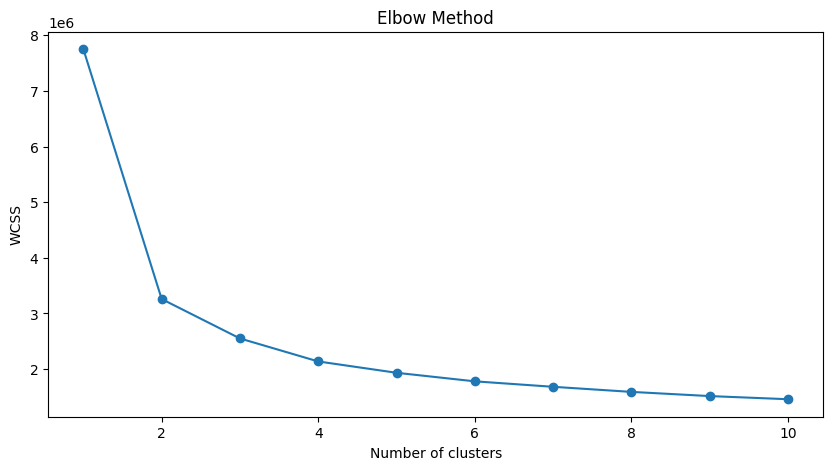

In [ ]:

# Plot the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Function to find the elbow point
def find_elbow(wcss):
    # Calculate the differences
    differences = np.diff(wcss)
    # Calculate the second order differences
    second_differences = np.diff(differences)
    # Find the index of the maximum second order difference
    elbow_index = np.argmax(second_differences) + 2
    return elbow_index

# Find and print the optimal number of clusters
optimal_clusters = find_elbow(wcss)
print(f"The optimal number of clusters is: {optimal_clusters}")


The optimal number of clusters is: 2


In [ ]:
# Perform clustering with the optimal number of clusters
optimal_kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = optimal_kmeans.fit_predict(data)


## **Hierarchical Clustering**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(data, method='ward')



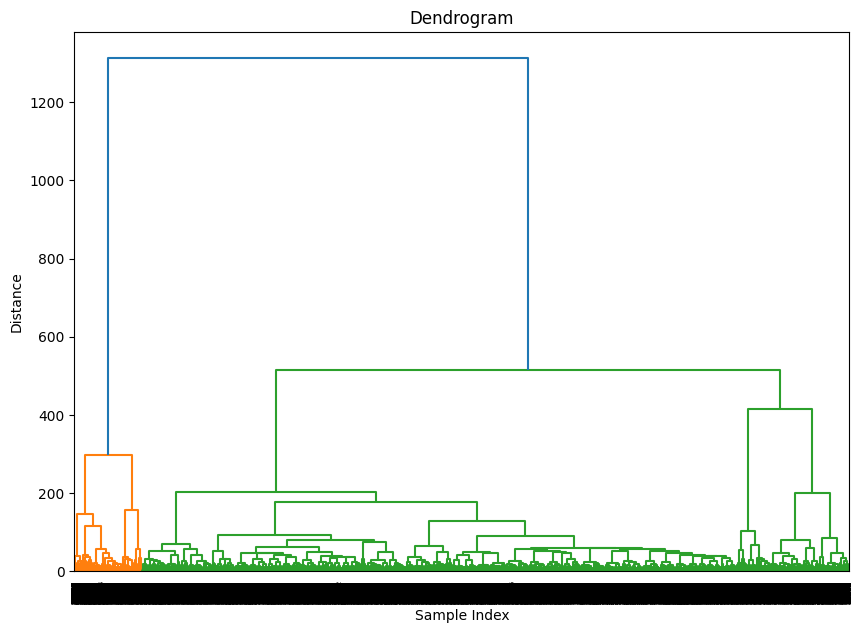

In [ ]:
# Function to plot the dendrogram
def plot_dendrogram(linkage_matrix):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title('Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Plot the dendrogram
plot_dendrogram(linkage_matrix)


In [ ]:

# Function to determine the optimal number of clusters
def find_optimal_clusters(linkage_matrix, max_clusters=10):
    last = linkage_matrix[-10:, 2]
    acceleration = np.diff(last, 2)
    optimal_clusters = acceleration.argmax() + 2
    return optimal_clusters

# Find and print the optimal number of clusters
optimal_clusters = find_optimal_clusters(linkage_matrix)
print(f"The optimal number of clusters is: {optimal_clusters}")


The optimal number of clusters is: 9


# Hierarchical vs K-means Clustering Comparison

| Aspect | Hierarchical Clustering | K-means Clustering |
|--------|-------------------------|---------------------|
| **Basic Approach** | Builds a tree of clusters | Partitions data into K clusters |
| **Algorithm Type** | Agglomerative (bottom-up) or Divisive (top-down) | Iterative partitioning |
| **Number of Clusters** | Can be determined after clustering | Must be specified beforehand |
| **Cluster Shape** | Can handle various shapes | Assumes spherical clusters |
| **Sensitivity to Outliers** | Less sensitive | More sensitive |
| **Scalability** | O(n^2) to O(n^3) - less scalable for large datasets | O(n*K*I) where I is #iterations - more scalable |
| **Memory Requirements** | Higher (stores distance matrix) | Lower |
| **Deterministic** | Yes | No (results can vary with different initializations) |
| **Interpretability** | Provides hierarchical representation (dendrogram) | Provides cluster centroids |
| **Handling Mixed Data Types** | Can use various distance metrics | Typically uses Euclidean distance |
| **Cluster Size Bias** | No inherent bias | Can produce uneven cluster sizes |
| **Convergence** | Always converges | May not always converge to global optimum |
| **Visualization** | Dendrogram | Scatter plot with centroids |
| **Best For** | Smaller datasets, hierarchical relationships | Larger datasets, when number of clusters is known |
| **Variants** | Single-linkage, Complete-linkage, Average-linkage, Ward's method | K-means++, Mini-batch K-means, Spherical K-means |
| **Computational Complexity** | Higher | Lower |
| **Ease of Implementation** | More complex | Simpler |
| **Sensitivity to Initial Conditions** | Less sensitive | More sensitive (depends on initial centroids) |
| **Ability to Capture Non-linear Relationships** | Better | Limited |

